In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
time = np.linspace(-5000, 250, 5251)
num_samples = len(time)

In [3]:
# setting up distributions to sample from

In [4]:
def Normal(mean=0.5, std_dev=0.2, num_samples=5251):
    normal = np.random.normal(mean, std_dev, num_samples**2)
    normal = normal[np.where(normal >= 0)[0]]
    normal = normal[np.where(normal <= 1)[0]]
    return normal

In [5]:
Normal = Normal()

In [6]:
def Uniform(min=0, max=1, num_samples=5251):
    uniform = np.random.uniform(min, max, num_samples**2)
    return uniform

In [7]:
Uniform = Uniform()

In [40]:
def Uniform_Double(min=-1, max=1, num_samples=5251):
    uniform_double = np.random.uniform(min, max, num_samples**2)
    return uniform_double

In [41]:
Uniform_Double = Uniform_Double()

In [42]:
def Gamma(k=7/4, theta=1/5, num_samples=5251):
    gamma = np.random.gamma(k, theta, num_samples**2)
    gamma = gamma[np.where(gamma >= 0)[0]]
    gamma = gamma[np.where(gamma <= 1)[0]]
    return gamma

In [43]:
Gamma = Gamma()

In [44]:
# sampling from distributions

In [45]:
samples_normal = np.random.choice(Normal, size=num_samples, replace=False)
samples_uniform = np.random.choice(Uniform, size=num_samples, replace=False)
samples_uniform_double = np.random.choice(Uniform_Double, size=num_samples, replace=False)
samples_gamma = np.random.choice(Gamma, size=num_samples, replace=False)

In [37]:
# plotting sample distributions

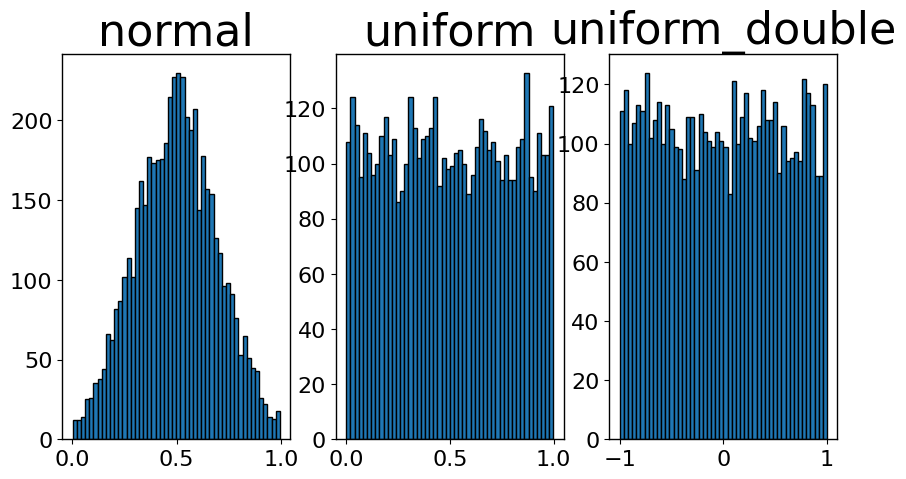

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axs[0].hist(samples_normal, bins=50);
axs[0].set_title('normal');
axs[1].hist(samples_uniform, bins=50);
axs[1].set_title('uniform');
axs[2].hist(samples_uniform_double, bins=50);
axs[2].set_title('uniform_double');

In [22]:
# set up 3d spins

In [23]:
r = np.random.choice(Uniform, size=num_samples, replace=False) # looks like a gamma distribution
theta = np.random.choice(Uniform, size=num_samples, replace=False)*np.pi - np.pi/2 # uniform from 0 to pi
phi = np.random.choice(Uniform, size=num_samples, replace=False)*2*np.pi -np.pi # uniform from 0 to 2pi

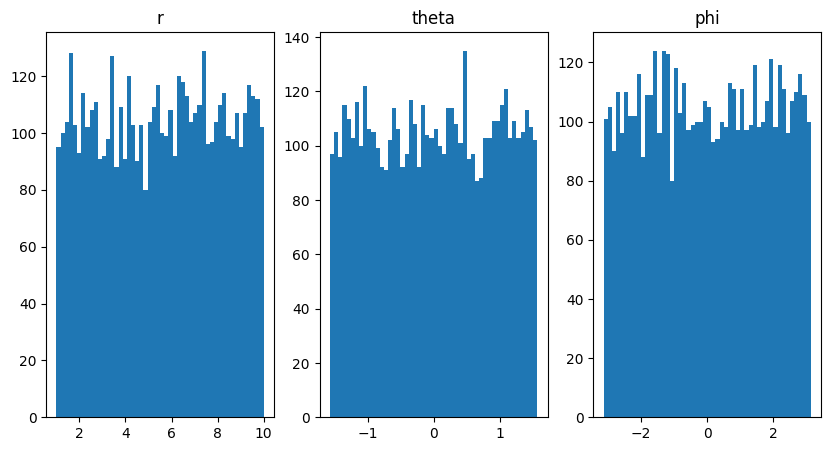

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axs[0].hist(r*9 +1, bins=50);
axs[0].set_title('r');
axs[1].hist(theta, bins=50);
axs[1].set_title('theta');
axs[2].hist(phi, bins=50);
axs[2].set_title('phi');

In [25]:
import crc

In [21]:
r, theta, phi = crc.sample_r(), crc.sample_theta(), crc.sample_phi()
x, y, z       = r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)
chi = np.array((x, y, z)).T

In [ ]:
fud = np.zeros((len(time), 1))
fuk = np.hstack((fud, np.zeros((len(time), 2))))
fud[:, 0] += z
fuk[:, 1] += x
fuk[:, 2] += y
print(fud.shape, fuk.shape)

In [ ]:
r, theta, phi = crc.sample_r(), crc.sample_theta(), crc.sample_phi()
x, y, z       = r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)
chi = np.vstack((z, x, y)).T
chi.shape

In [ ]:
fig = plt.figure(figsize=(10, 5));
ax = fig.add_subplot(projection='3d');
ax.scatter(x, y, z, marker='.', alpha=1/5);
fig.tight_layout();